In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [3]:
df_45 = pd.read_csv('qmof_data/stoich45_fingerprints.csv', index_col=0)
df_120 = pd.read_csv('qmof_data/stoich120_fingerprints.csv', index_col=0)
bandgaps = pd.read_csv('qmof_data/qmof-bandgaps.csv', index_col=0)

In [4]:
df = df_45.join(df_120, how='outer', lsuffix='_45', rsuffix='_120')
df = df.join(bandgaps[['BG_PBE']])
df = df.dropna(subset=['BG_PBE'])

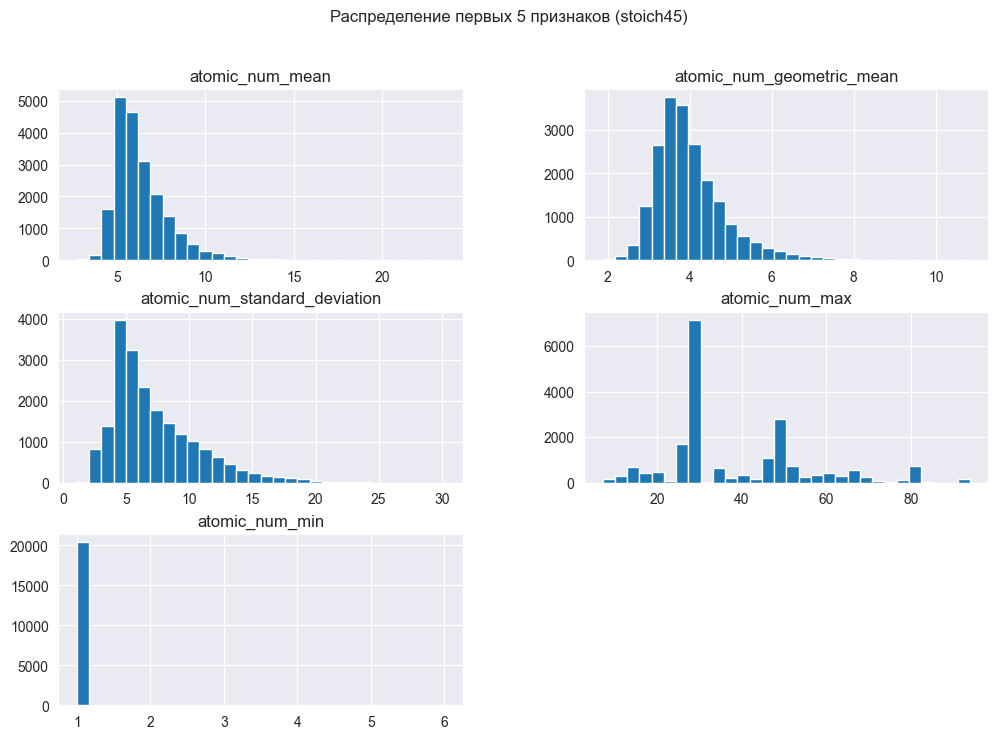

In [5]:
df_45.iloc[:, :5].hist(bins=30, figsize=(12, 8))
plt.suptitle("Распределение первых 5 признаков (stoich45)")
plt.show()

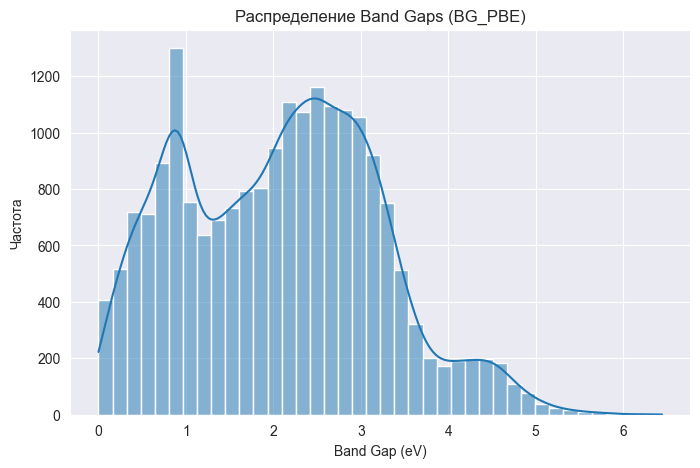

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BG_PBE'], bins=40, kde=True)
plt.title("Распределение Band Gaps (BG_PBE)")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Частота")
plt.show()

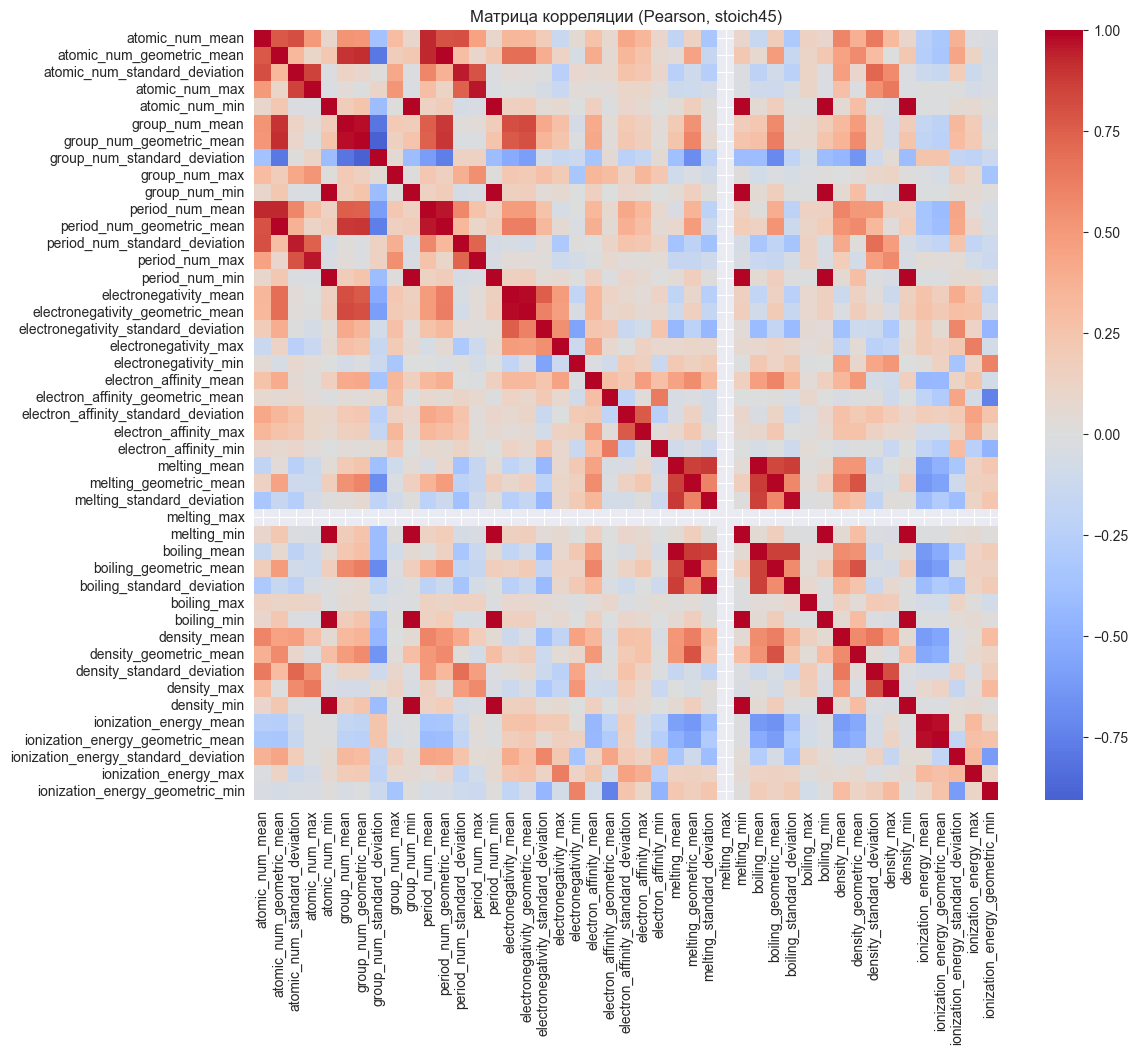

In [7]:
corr_matrix = df_45.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Матрица корреляции (Pearson, stoich45)")
plt.show()

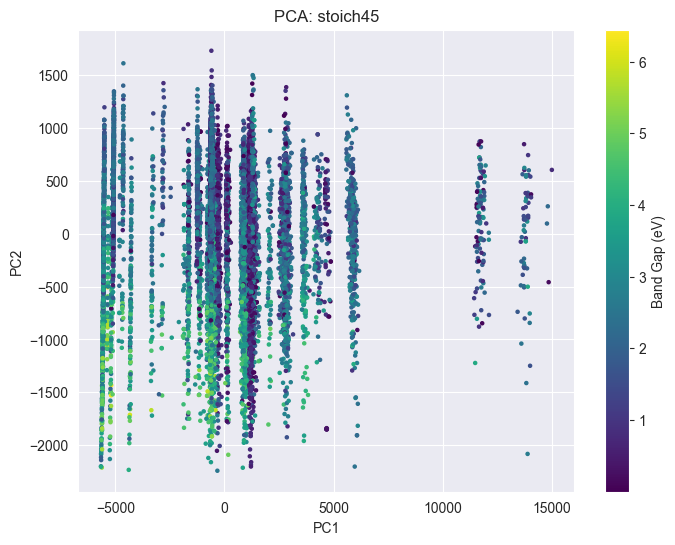

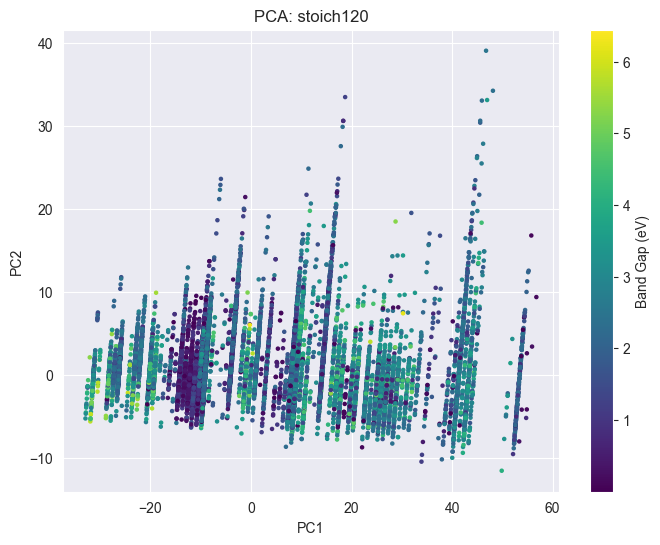

In [8]:
def pca_plot(X, title):
    X_clean = X.dropna()
    y = df.loc[X_clean.index, 'BG_PBE']  # Сопоставляем только соответствующие значения
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_clean)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
    plt.colorbar(scatter, label='Band Gap (eV)')
    plt.title(f'PCA: {title}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


pca_plot(df_45.dropna(), 'stoich45')
pca_plot(df_120.dropna(), 'stoich120')

D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


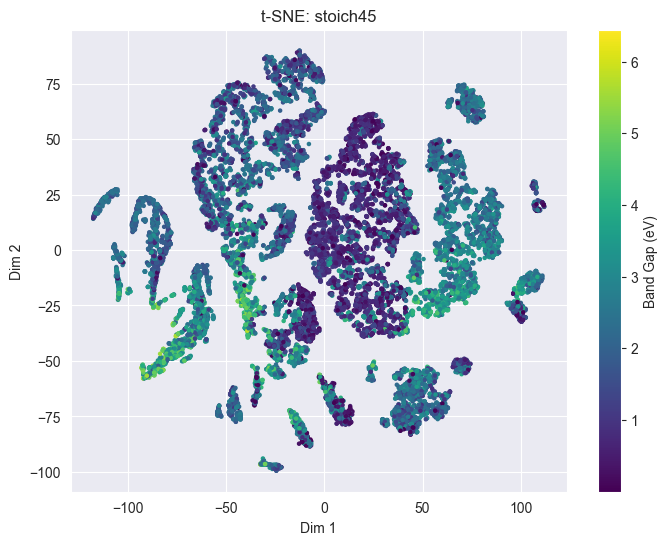

D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


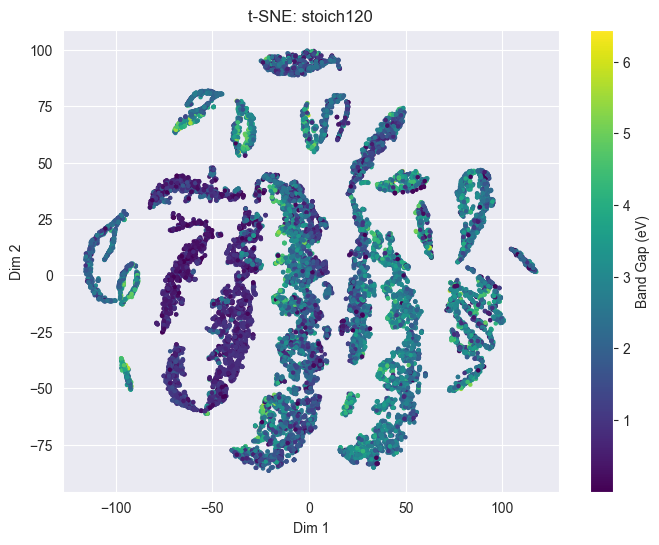

In [9]:
def tsne_plot(X, title):
    X_clean = X.dropna()
    y = df.loc[X_clean.index, 'BG_PBE']
    tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_clean)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
    plt.colorbar(scatter, label='Band Gap (eV)')
    plt.title(f't-SNE: {title}')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.show()


tsne_plot(df_45.dropna(), 'stoich45')
tsne_plot(df_120.dropna(), 'stoich120')

D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\AiXELO_Project\AXL\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


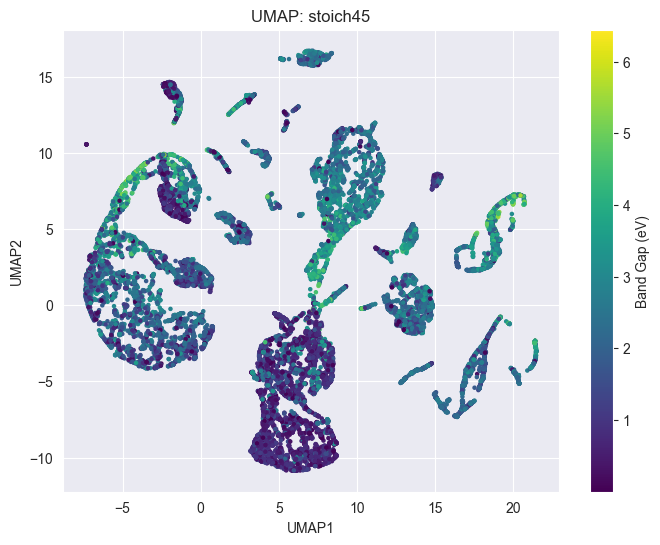

D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\AiXELO_Project\AXL\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


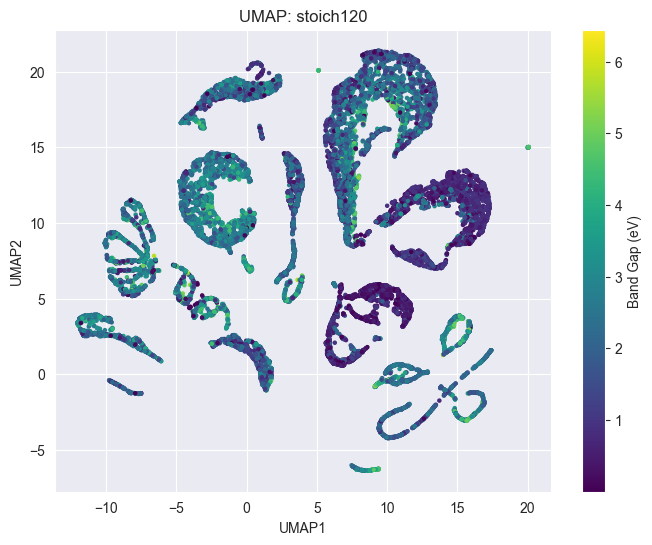

In [10]:
def umap_plot(X, title):
    X_clean = X.dropna()
    y = df.loc[X_clean.index, 'BG_PBE']
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_umap = reducer.fit_transform(X_clean)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=5)
    plt.colorbar(scatter, label='Band Gap (eV)')
    plt.title(f'UMAP: {title}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()


umap_plot(df_45.dropna(), 'stoich45')
umap_plot(df_120.dropna(), 'stoich120')